<a href="https://colab.research.google.com/github/boyercb/bst263-final-project/blob/master/BST_263_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from joblib import dump, load

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, l1_min_c
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

**Load data**

In [0]:
# currently the coding is 
# run cleaning code
# url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/mydata_unique.csv'
url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/data/'
mydata = pd.read_csv(url + "mydata_all.csv")

X_train = pd.read_csv(url + "X_train.csv")
X_test = pd.read_csv(url + "X_test.csv")

y_train = pd.read_csv(url + "y_train.csv", header=None)
y_test = pd.read_csv(url + "y_test.csv", header=None)

y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]

**SKIP/COMMENT OUT THIS SECTION IF RUNNING AUGMENTED**

In [0]:
# create training and validation sets

# total column number
# cols = mydata.shape[1]
# col_image_end = cols-5
# col_label = cols-1

# train, test = train_test_split(mydata, test_size=0.20, random_state=42)

# X_train, y_train = train.iloc[:, 0:col_image_end], train.iloc[:, col_label]
# X_test, y_test = test.iloc[:, 0:col_image_end], test.iloc[:, col_label]



**Image pre-processing**

In [0]:
# preprocessing 
scaler = StandardScaler().fit(X_train)
X_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# constants
n_folds = 10
seed = 3370

model_names = ["SVM linear", "Logistic", "Random Forest", "LDA", "QDA", "XGBoost", "Naive Bayes", "Ensemble"]
filenames = ["svm_rbf_aug", "logistic_aug", "rf_aug", "LDA_aug", "QDA_aug", "gb_aug", "bayes_aug", "ensemble_aug"]

# tuning parameters
svm_rbf_params = {
    'C': np.logspace(-4, 1, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_poly_params = {
    'C': np.logspace(-4, 1.5, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_sig_params = {
    'C': np.logspace(-4, 1, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_lin_params = {'C': np.logspace(-4, 0, 25)}

logit_params = {
    'C': np.logspace(-4, 0.5, 25), 
    'intercept_scaling': [100000],
    }

rf_params = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(1, 100, 11)],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 9, 10],
    'n_estimators': [int(x) for x in np.linspace(50, 1000, 5)]
}

gb_params = {
    'learning_rate': np.linspace(0.01, 0.1, num = 4),
    'max_depth': [1, 5, 10, 20, 40, 80, 100],
    'subsample': [0.8],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [int(x) for x in np.linspace(10, 1000, 5)]
}

**Model 1: SVM**
1. Use "rbf" kernel

In [0]:
# model: SVM - rbf
svc_rbf = SVC(kernel = "rbf", random_state=seed)
svm_rbf = GridSearchCV(
    svc_rbf, 
    svm_rbf_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )
svm_rbf.fit = svm_rbf.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.1min


KeyboardInterrupt: ignored

2. Use "poly" kernel


In [0]:
# model: SVM - poly kernel
svc_poly = SVC(kernel = "poly", random_state=seed)
svm_poly = GridSearchCV(
    svc_poly, 
    svm_poly_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
svm_poly.fit = svm_poly.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 34.5min finished


3. Use "sigmoid" kernel

In [0]:
# model: SVM - sigmoid kernel
svc_sig = SVC(kernel = "sigmoid", random_state=seed)
svm_sig = GridSearchCV(
    svc_sig, 
    svm_sig_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
svm_sig.fit = svm_sig.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 25.2min
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 30.3min finished


4. Use "linear" kernel

In [0]:
# model: SVM - linear kernel
svc_lin = SVC(kernel = "linear", random_state=seed)
svm_lin = GridSearchCV(
    svc_lin, 
    svm_lin_params, 
    cv=n_folds, 
    scoring='accuracy', 
    verbose=2,
    n_jobs=-1)
svm_lin.fit = svm_lin.fit(X_std, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  5.2min finished


5. Compare prediction AUCs across different kernels 

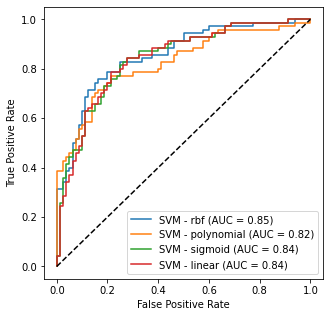

In [0]:
svm_models = [svm_rbf, svm_poly, svm_sig, svm_lin]
svm_names = ["SVM - rbf", "SVM - polynomial", "SVM - sigmoid", "SVM - linear"]

aucs_test = []
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(svm_models, svm_names): 
    roc_output = metrics.plot_roc_curve(mod[0], X_test_std, y_test, 
                                        ax=ax, name=mod[1])
    aucs_test.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Model 2: L1-logistic regression**

In [0]:
# model: L1-logistic regression
logit = LogisticRegression(penalty='l1', solver='liblinear', random_state=seed)
logistic = GridSearchCV(
    logit, 
    logit_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )

logistic.fit = logistic.fit(X_std, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   56.1s finished


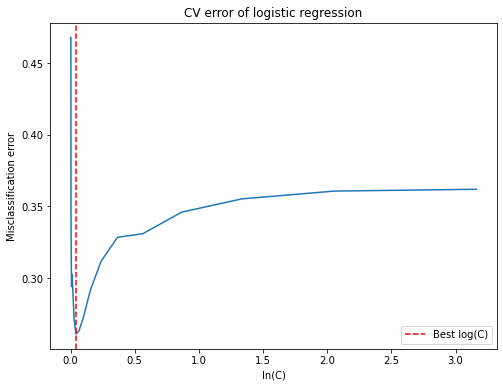

In [0]:
# plot CV errors
b = logistic.cv_results_['mean_test_score'].argmax()

plt.figure().set_size_inches(8, 6)
plt.plot(logit_params['C'],1 - logistic.cv_results_['mean_test_score'])
plt.axvline(logit_params['C'][b], linestyle='--', color='red', label='Best log(C)')
plt.ylabel('Misclassification error')
plt.xlabel('ln(C)')
plt.title('CV error of logistic regression')
plt.legend(loc='lower right')
plt.show()

**Model 3: Random forest**

In [0]:
# model: Random forest 
rf = RandomForestClassifier(random_state=seed)
rf = RandomizedSearchCV(  
    estimator=rf, 
    param_distributions=rf_params, 
    n_iter = 140,
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,  
    n_jobs=-1
)
rf.fit = rf.fit(X_std, y_train)


Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed: 46.6min finished


In [0]:
etrees = ExtraTreesClassifier(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=3,
    max_features='sqrt',
    max_depth=10,
    bootstrap=True
)
etrees.fit(X_std, y_train)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=10, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

**Model 4: LDA**
1. Create PCs to reduce dimensions

Variance Explained,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50
Number of PCs Needed,511,329,224,154,105,68,41,22,11,6


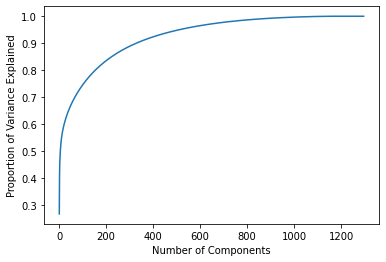

In [0]:
full_pca = PCA(random_state=0).fit(X_std)
full_pca.n_components_

cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_) 

plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

cutoffs = np.flip(np.arange(0.5, 1, 0.05))
cutoffs_df = pd.DataFrame([[min(np.arange(len(cum_exp_var))[cum_exp_var > c]) + 1 for c in cutoffs]], 
                          columns=cutoffs, index=['Number of PCs Needed'])
cutoffs_df.columns.name = 'Variance Explained'
cutoffs_df

2. Fit LDA with PCs



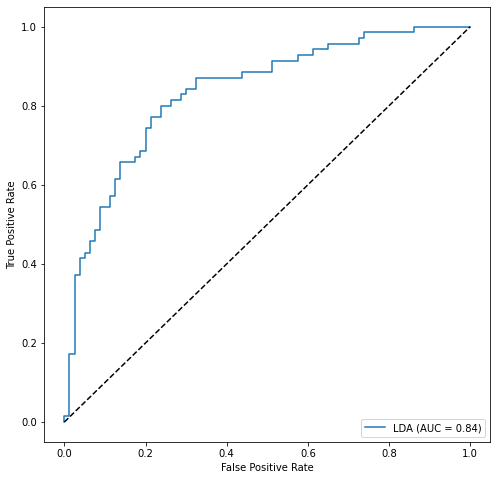

In [0]:
# model: LDA
lda_pca = PCA(224, random_state=0).fit(X_std)
##lda_pca = PCA(153, random_state=0).fit(X_std)
X_std_lda = lda_pca.transform(X_std)
X_test_std_lda = lda_pca.transform(X_test_std)

LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_std_lda, y_train)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
roc_output = metrics.plot_roc_curve(LDA, X_test_std_lda, y_test, ax=ax, name="LDA")

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Model 5: QDA**
Fit model with PCs

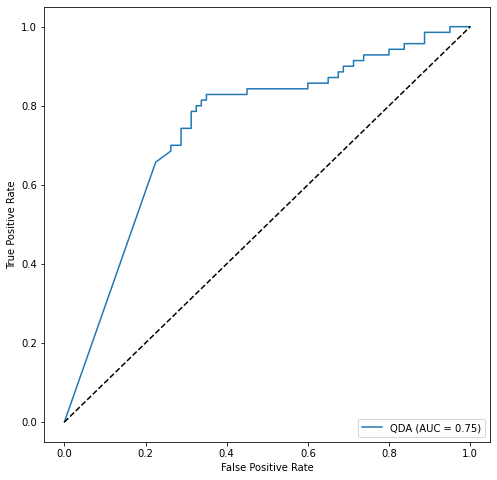

In [0]:
# model: QDA
qda_pca = PCA(224, random_state=0).fit(X_std)
##qda_pca = PCA(153, random_state=0).fit(X_std)
X_std_qda = qda_pca.transform(X_std)
X_test_std_qda = qda_pca.transform(X_test_std)

QDA = QuadraticDiscriminantAnalysis()
QDA=QDA.fit(X_std_lda, y_train)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
roc_output = metrics.plot_roc_curve(QDA, X_test_std_lda, y_test, ax=ax, name="QDA")

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Model 6: XGBoost**

In [0]:
# model: XGBoost
gb = GradientBoostingClassifier(random_state=seed) 
gb = GridSearchCV(
    estimator=gb, 
    param_grid=gb_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2, 
    n_jobs=-1
)
gb.fit = gb.fit(X_std, y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed: 22.8min finished


**Model 7: Naive Bayes**

In [0]:
# model: Naive Bayes
bayes = GaussianNB()
bayes.fit(X_std, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Model 8: Voting Ensemble Classifier**

In [0]:
from sklearn.model_selection import cross_val_score

# model: Ensemble
models = [("Logistic",logistic.best_estimator_),
          ("Random Forest",rf.best_estimator_),
          ("XGBoost",gb.best_estimator_)]

np.random.seed(123)

#df = pd.DataFrame(columns=('w1', 'w2', 'w3', 'mean', 'std'))

#i = 0
#for w1 in range(1,4):
#    for w2 in range(1,4):
#        for w3 in range(1,4):

#            if len(set((w1,w2,w3))) == 1: # skip if all weights are equal
#                continue

#            ensemble = VotingClassifier(
#                estimators=models, 
#                weights=[w1,w2,w3], 
#                voting='soft')
            
#            scores = cross_val_score(
#                estimator=ensemble,
#                X=X_std,
#                y=y_train,
#                cv=n_folds,
#                scoring='accuracy',
#                verbose=2, 
#                n_jobs=-1)

#            df.loc[i] = [w1, w2, w3, scores.mean(), scores.std()]
#            i += 1

df.sort_values(by=['mean', 'std'], ascending=False)


,w1,w2,w3,mean,std
7,1.0,3.0,3.0,0.763878,0.030990
12,2.0,2.0,3.0,0.763045,0.032560
10,2.0,1.0,3.0,0.762628,0.033444
1,1.0,1.0,3.0,0.762626,0.033089
3,1.0,2.0,2.0,0.762621,0.031878
4,1.0,2.0,3.0,0.762206,0.032336
6,1.0,3.0,2.0,0.761782,0.029682
15,2.0,3.0,3.0,0.761782,0.031408
0,1.0,1.0,2.0,0.761367,0.031854
21,3.0,2.0,3.0,0.760945,0.032824


In [0]:

ensemble = VotingClassifier(
    estimators=models,
    weights=[1,3,3], 
    voting='soft'
)
ensemble.fit(X_std, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=0.042169650342858224,
                                                 class_weight=None, dual=False,
                                                 fit_intercept=True,
                                                 intercept_scaling=100000,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=3370,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Random Forest',
                              RandomForestClassifier(bootstr...
                                                         max_leaf_nodes=None,
                    

**Save trained models**

In [0]:
models = [ensemble]
filenames = ["ensemble_aug"]

for mod in zip(models, filenames):
  dump(mod[0], mod[1])

**Load trained models (START HERE)**

In [0]:
svm_rbf = load('svm_rbf_aug')
logistic = load('logistic_aug')
rf = load('rf_aug')
LDA = load('LDA_aug')
QDA = load('QDA_aug')
gb = load('gb_aug')
bayes = load('bayes_aug')
ensemble = load('ensemble_aug')

/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator QuadraticDiscriminantAnalysis from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpick

In [0]:
rwdir = "/Volumes/GoogleDrive/My Drive/Serious stuff/AY19:20 Course materials/BST263/Project/"
svm_rbf = load(rwdir + 'svm_rbf_aug')
logistic = load(rwdir + 'logistic_aug')
rf = load(rwdir + 'rf_aug')
LDA = load(rwdir + 'LDA_aug')
QDA = load(rwdir + 'QDA_aug')
gb = load(rwdir + 'gb_aug')
bayes = load(rwdir + 'bayes_aug')
ensemble = load(rwdir + 'ensemble_aug')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:313: UserWar

**Model evaluation and comparison**

In [0]:
y_train_pred_svm_rbf = smv_rbf.fit.predict(X_std)
y_train_pred_logistic = logistic.fit.predict(X_std)
y_train_pred_rf = rf.fit.predict(X_std)
y_train_pred_lda = LDA.predict(X_std_lda)
y_train_pred_qda = QDA.predict(X_std_qda)
y_train_pred_xgb = gb.fit.predict(X_std)
y_train_pred_bayes = bayes.predict(X_std)
y_train_pred_ensemble = ensemble.predict(X_std)


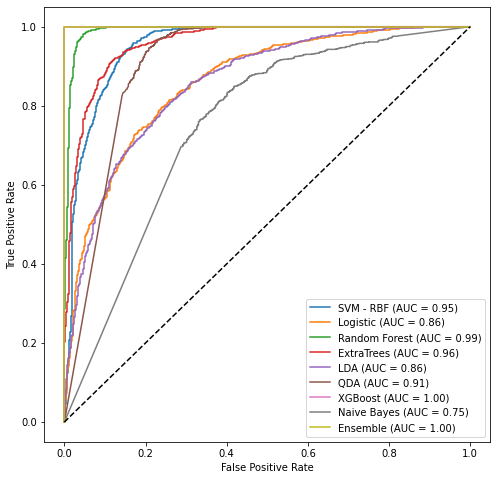

In [0]:
models = [svm_rbf, logistic, rf, etrees, LDA, QDA, gb, bayes, ensemble]
model_names = ["SVM - RBF", "Logistic", "Random Forest", "ExtraTrees", "LDA", "QDA", "XGBoost", "Naive Bayes", "Ensemble"]

aucs_train = []
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(models, model_names): 
    if mod[1] == "LDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_std_lda, y_train, 
                                        ax=ax, name=mod[1])
    elif mod[1] == "QDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_std_qda, y_train, 
                                        ax=ax, name=mod[1])
    else:
      roc_output = metrics.plot_roc_curve(mod[0], X_std, y_train, 
                                        ax=ax, name=mod[1])
    aucs_train.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

In [0]:
y_test_pred_svm_rbf = svm_rbf.fit.predict(X_test_std)
y_test_pred_logistic = logistic.fit.predict(X_test_std)
y_test_pred_rf = rf.fit.predict(X_test_std)
y_test_pred_lda = LDA.predict(X_test_std_lda)
y_test_pred_qda = QDA.predict(X_test_std_qda)
y_test_pred_xgb = gb.fit.predict(X_test_std)
y_test_pred_bayes = bayes.predict(X_test_std)
y_test_pred_ensemble = ensemble.predict(X_test_std)

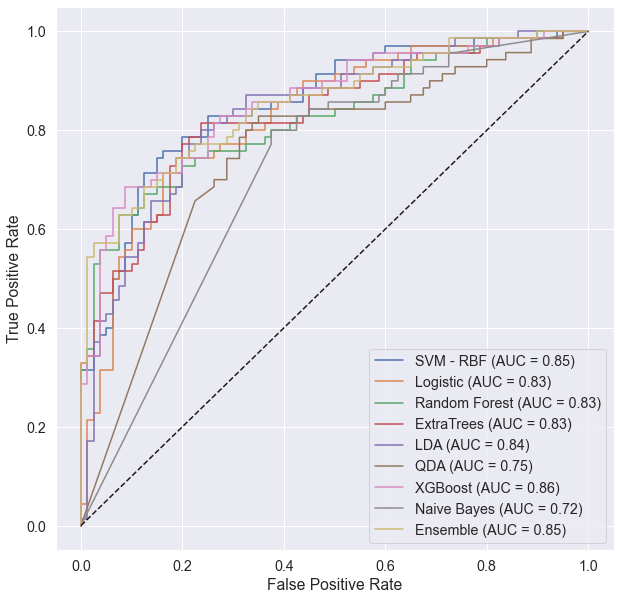

In [0]:
aucs_test = []
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(models, model_names): 
    if mod[1] == "LDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_test_std_lda, y_test, 
                                        ax=ax, name=mod[1])
    elif mod[1] == "QDA":
      roc_output = metrics.plot_roc_curve(mod[0], X_test_std_qda, y_test, 
                                        ax=ax, name=mod[1])
    else:
      roc_output = metrics.plot_roc_curve(mod[0], X_test_std, y_test, 
                                        ax=ax, name=mod[1])
    aucs_test.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()
fig.savefig('roc_unaug.png')


In [0]:
y_pred_proba_ens = ensemble.predict_proba(X_test_std)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_ens)
roc = pd.DataFrame(np.column_stack([tpr, 1-fpr, thresholds]), columns=['Sensitivity', 'Specificity', 'Cutoffs'])
roc.to_csv("SESP.csv")

In [0]:
pd.DataFrame(np.vstack([aucs_train, aucs_test]), 
             index=["Training AUC", "Test AUC"], 
             columns=model_names)

,SVM - RBF,Logistic,Random Forest,LDA,QDA,XGBoost,Naive Bayes,Ensemble
Training AUC,0.951688,0.858842,0.991177,0.855742,0.906437,1.000000,0.751601,1.000000
Test AUC,0.854464,0.827321,0.825179,0.836071,0.748393,0.856071,0.716875,0.853214


**Visualization: Confusion matrices**

In [0]:
data = {'y_obs': y_test,
        'y_svm_rbf': y_test_pred_svm_rbf,
        'y_logistic': y_test_pred_logistic,
        'y_rf': y_test_pred_rf,
        'y_lda': y_test_pred_lda,
        'y_qda': y_test_pred_qda,
        'y_xgb': y_test_pred_xgb,
        'y_bayes': y_test_pred_bayes,
        'y_ensemble': y_test_pred_ensemble,
        }


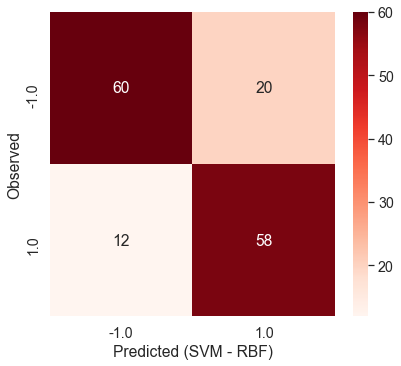

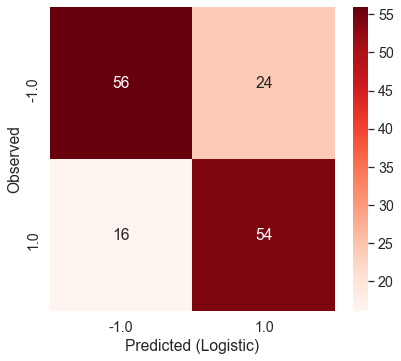

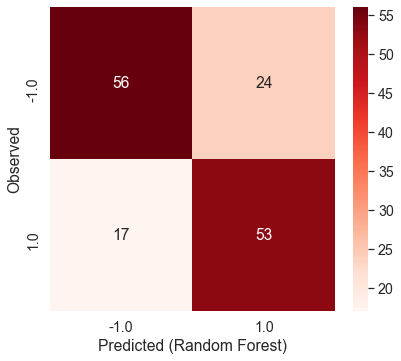

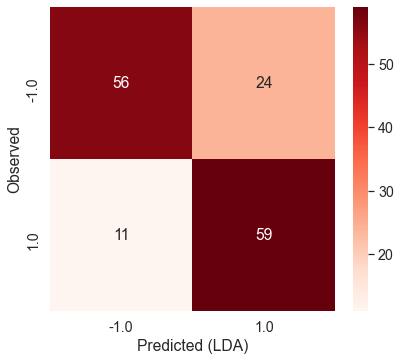

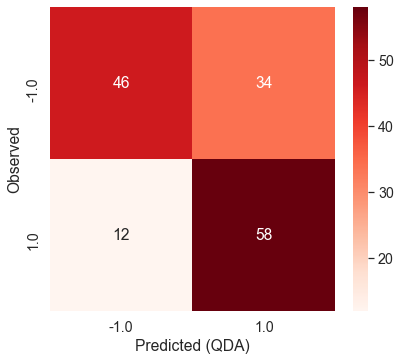

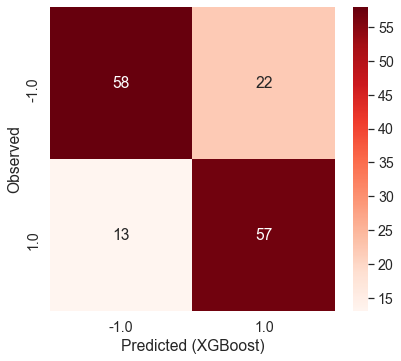

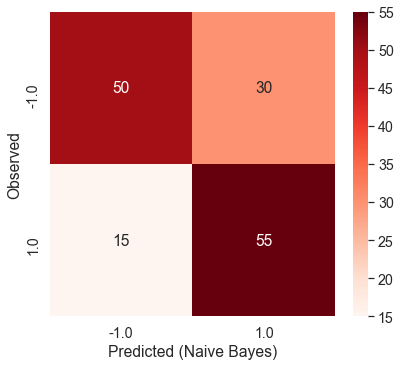

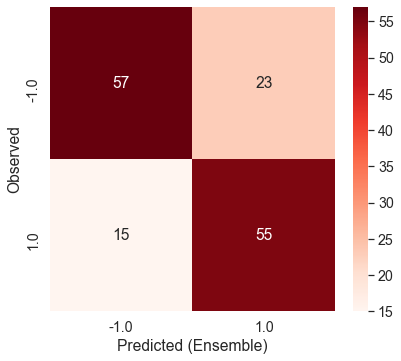

In [0]:
df = pd.DataFrame(data)
colnames = ['y_svm_rbf', 'y_logistic', 'y_rf', 'y_lda', 'y_qda', 'y_xgb', 'y_bayes', 'y_ensemble']
sn.set(font_scale=1.3)
for col in zip(colnames, model_names): 
  fig = plt.figure(figsize=(6.4, 5.6))
  name = 'Predicted (' + col[1] + ')'
  confusion_matrix = pd.crosstab(df['y_obs'], df[col[0]], rownames = ['Observed'], colnames = [name])
  sn.heatmap(confusion_matrix, fmt='.0f', cmap = "Reds", annot=True)
  plt.show()
  fig.savefig(col[1] + "_aug")




**Clustering/Data reduction**

In [0]:
full_pca = PCA(random_state=0).fit(X_std)
full_pca.n_components_

cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_) 

plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

cutoffs = np.flip(np.arange(0.5, 1, 0.05))
cutoffs_df = pd.DataFrame([[min(np.arange(len(cum_exp_var))[cum_exp_var > c]) + 1 for c in cutoffs]], 
                          columns=cutoffs, index=['Number of PCs Needed'])
cutoffs_df.columns.name = 'Variance Explained'
cutoffs_df

Variance Explained,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50
Number of PCs Needed,511,329,224,154,105,68,41,22,11,6


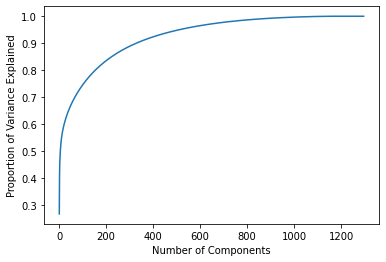

In [0]:
# Generate PCAR
from sklearn.decomposition import PCA
full_pca = PCA(random_state=0).fit(X_std)
full_pca.n_components_

cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)

plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

cutoffs = np.flip(np.arange(0.5, 1, 0.05))
cutoffs_df = pd.DataFrame([[min(np.arange(len(cum_exp_var))[cum_exp_var > c]) + 1 for c in cutoffs]], 
                          columns=cutoffs, index=['Number of PCs Needed'])
cutoffs_df.columns.name = 'Variance Explained'
cutoffs_df


In [0]:
# model: KMeans
final_pca = PCA(224, random_state=0).fit(X_train)
pixels_transform = final_pca.transform(X_train)

kmeans_kpp = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0).fit(pixels_transform)
kmeans_kpp_labels = kmeans_kpp.labels_

In [0]:
# model: EM
em_kmeans = GaussianMixture(n_components=2, init_params='kmeans', n_init=1, random_state=0).fit(pixels_transform)
em_kmeans_labels = em_kmeans.predict(pixels_transform)

In [0]:
svm_pca_rbf = GridSearchCV(
    svc_rbf, 
    svm_rbf_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )
svm_pca_rbf.fit = svm_rbf.fit(pixels_transform, y_train)

NameError: ignored

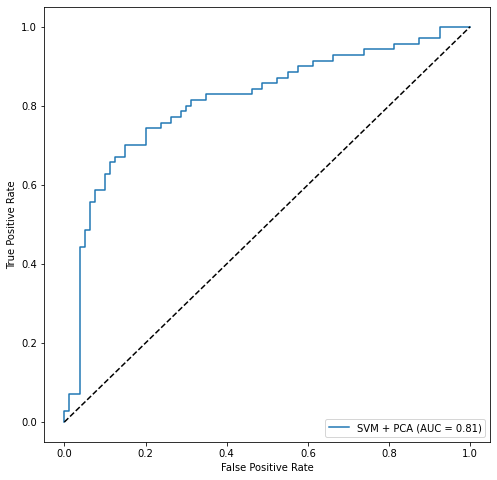

In [0]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
roc_output = metrics.plot_roc_curve(svm_rbf, final_pca.transform(X_test), y_test, 
                                        ax=ax, name="SVM + PCA")
ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Visualization**

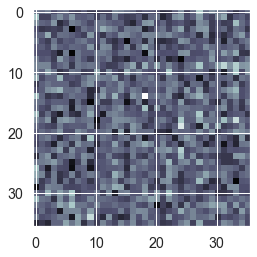

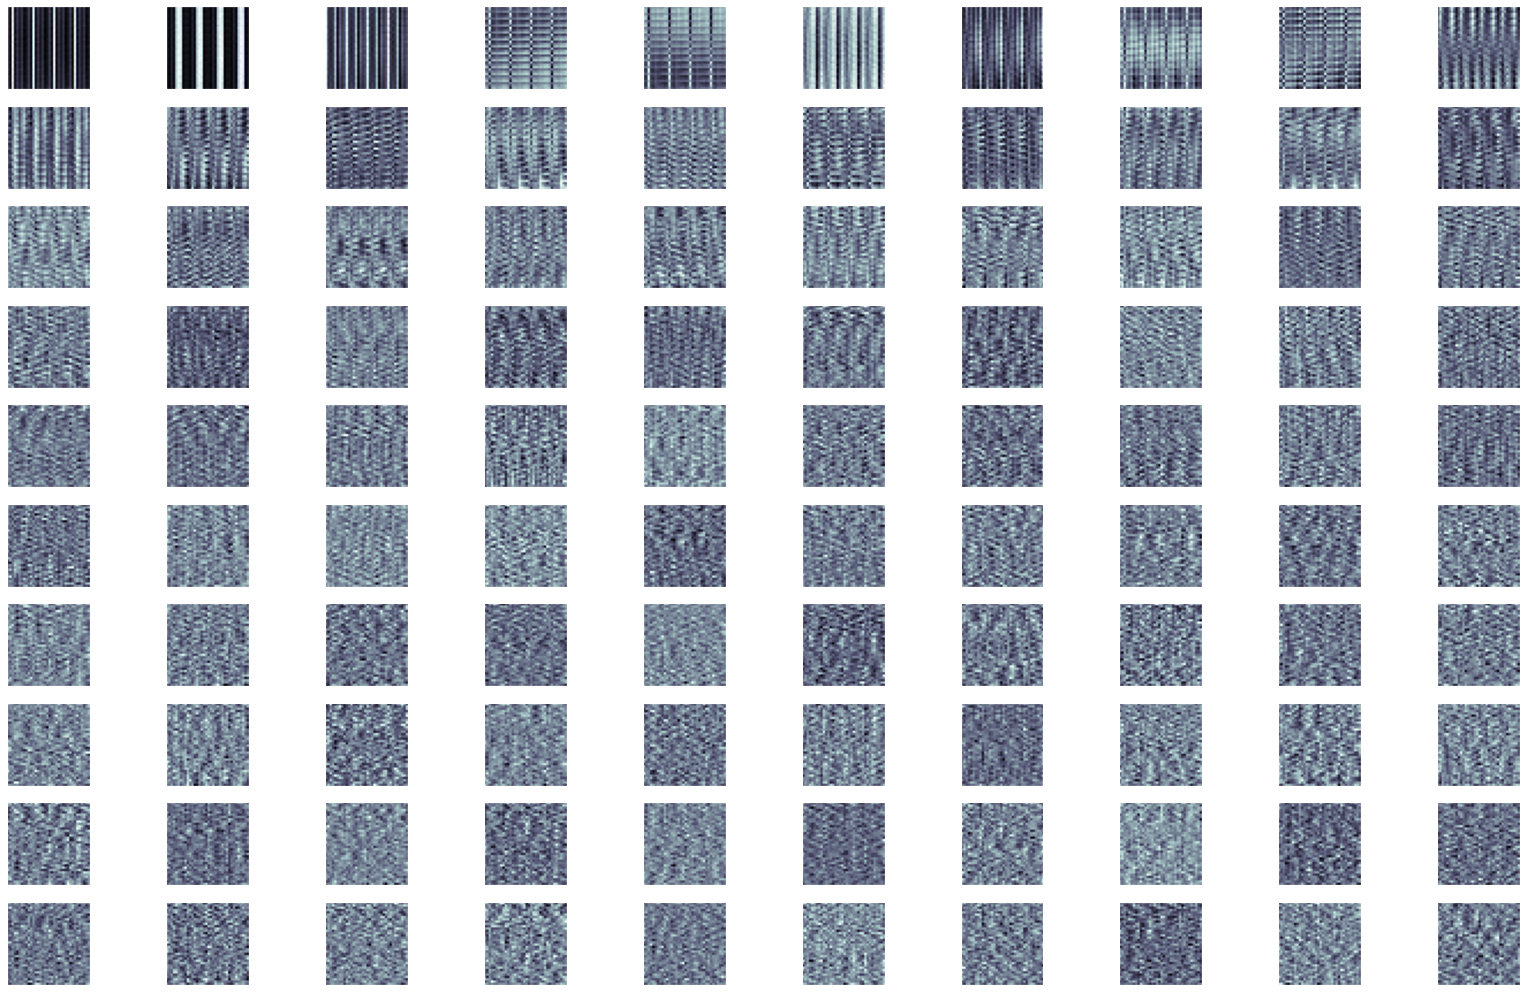

In [0]:
plt.imshow(full_pca.mean_.reshape((36, 36)), cmap=plt.cm.bone)

fig = plt.figure(figsize=(28, 18))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(full_pca.components_[i].reshape((36, 36)),
              cmap=plt.cm.bone)

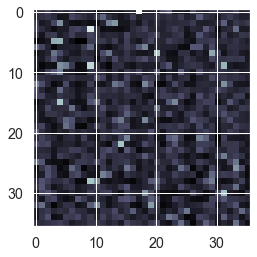

In [0]:
plt.imshow(X_train.iloc[1, 0:1296].values.reshape((36, 36)), cmap=plt.cm.bone)


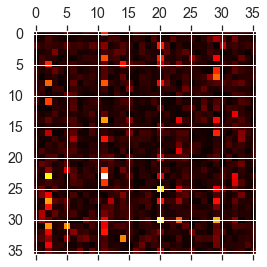

In [0]:
importances = rf.best_estimator_.feature_importances_
importances = importances.reshape((36,36))

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.show()

In [0]:
svc_rbf_pca = SVC(kernel = "rbf", C = 0.91, gamma = 0.001, random_state=seed)
svm_rbf_pca = svc_rbf_pca.fit(X_std_lda, y_train)

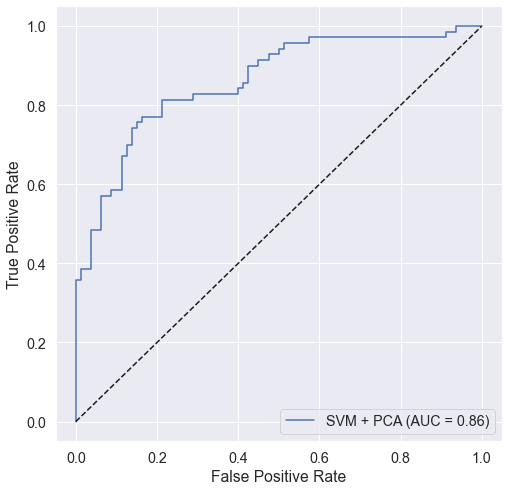

In [0]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
roc_output = metrics.plot_roc_curve(svm_rbf_pca, X_test_std_lda, y_test, ax=ax, name="SVM + PCA")

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

In [0]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

AttributeError: ignored

In [68]:
np.where(y_test_pred_xgb != y_test)

(array([  8,  10,  17,  22,  23,  24,  39,  41,  45,  58,  61,  62,  67,
         72,  73,  74,  85,  86,  87,  88,  90,  92,  93,  98, 101, 106,
        112, 113, 118, 125, 131, 132, 138, 139, 146]),)